In [7]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Administrator\Desktop\AI homework\Multiple Regression\dataset\winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [8]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [9]:
df.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85...
freq,4


In [11]:
# 查看列名
print(df.columns)

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')


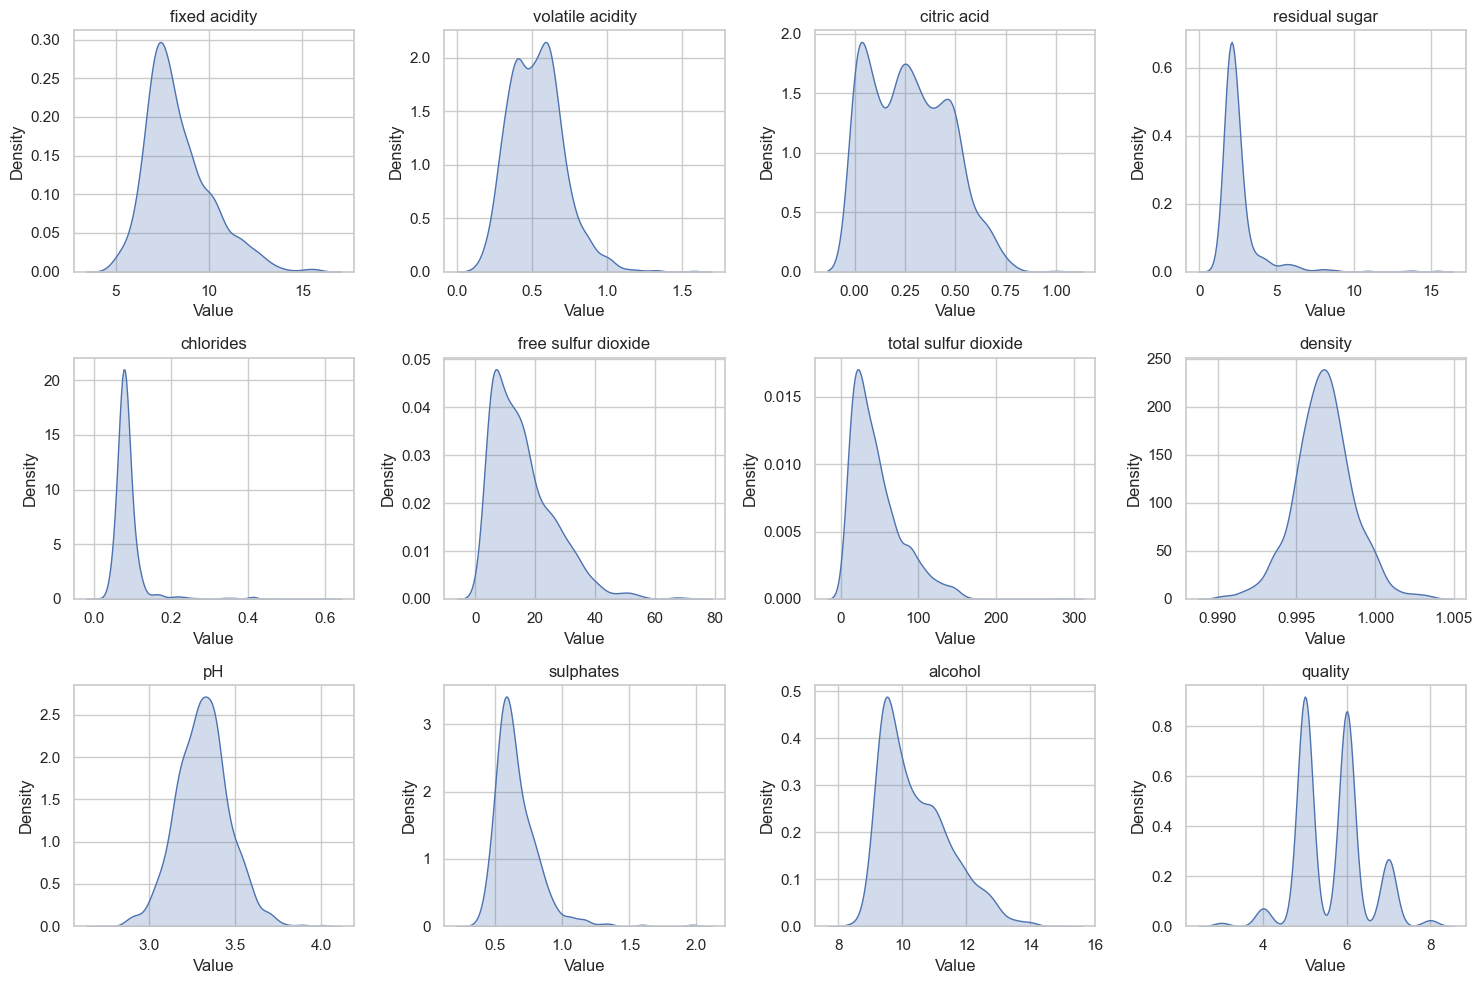

In [17]:
# 导入所需的库
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv(r'C:\Users\Administrator\Desktop\AI homework\Multiple Regression\dataset\winequality-red.csv', sep=';')

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个绘图对象
plt.figure(figsize=(15, 10))

# 遍历每一列并绘制分布曲线
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 4, i + 1)  # 3行4列的子图
    sns.kdeplot(df[column], fill=True)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Density')

# 调整布局
plt.tight_layout()
plt.show()

模型性能指标：
线性回归模型: MSE = 0.3900, R² = 0.4032
岭回归模型: MSE = 0.3929, R² = 0.3987
弹性网模型: MSE = 0.6572, R² = -0.0056

最佳模型: LinearRegression，MSE = 0.3900


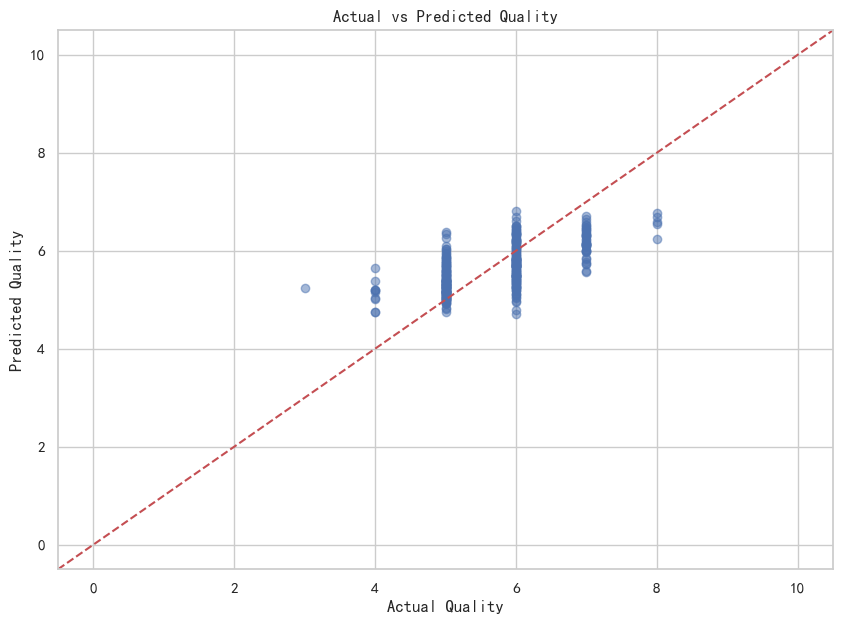

0.6388575796414593

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
plt.rcParams['font.sans-serif'] = [u'simHei']  # 指定中文字体为黑体，防止乱码
plt.rcParams['axes.unicode_minus'] = False     # 使用ASCII字符，保证显示正确

# 分割数据集
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 选择需要缩放的特征
features_to_scale = ['free sulfur dioxide', 'total sulfur dioxide']

# 初始化缩放器
scaler = StandardScaler()

# 缩放特征
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

# 初始化模型
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 训练模型
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)

# 预测
lr_pred = lr.predict(X_test)
ridge_pred = ridge.predict(X_test)
elastic_net_pred = elastic_net.predict(X_test)

# 计算性能指标
lr_mse = mean_squared_error(y_test, lr_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
lr_r2 = r2_score(y_test, lr_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# 找出最佳模型
best_model_mse = min(lr_mse, ridge_mse, elastic_net_mse)
if best_model_mse == lr_mse:
    best_model = lr
    best_pred = lr_pred
elif best_model_mse == ridge_mse:
    best_model = ridge
    best_pred = ridge_pred
else:
    best_model = elastic_net
    best_pred = elastic_net_pred

# 输出各个模型的指标
print("模型性能指标：")
print(f"线性回归模型: MSE = {lr_mse:.4f}, R² = {lr_r2:.4f}")
print(f"岭回归模型: MSE = {ridge_mse:.4f}, R² = {ridge_r2:.4f}")
print(f"弹性网模型: MSE = {elastic_net_mse:.4f}, R² = {elastic_net_r2:.4f}")

# 输出最佳模型的信息
print(f"\n最佳模型: {best_model.__class__.__name__}，MSE = {best_model_mse:.4f}")

# 绘制散点图
plt.figure(figsize=(10, 7))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.axline([0, 0], [10, 10], color='r', linestyle='--')
plt.show()

# 计算Pearson相关系数
pearson_corr, _ = pearsonr(y_test, best_pred)
pearson_corr


XGBoost模型: MSE = 0.3426, R² = 0.4758


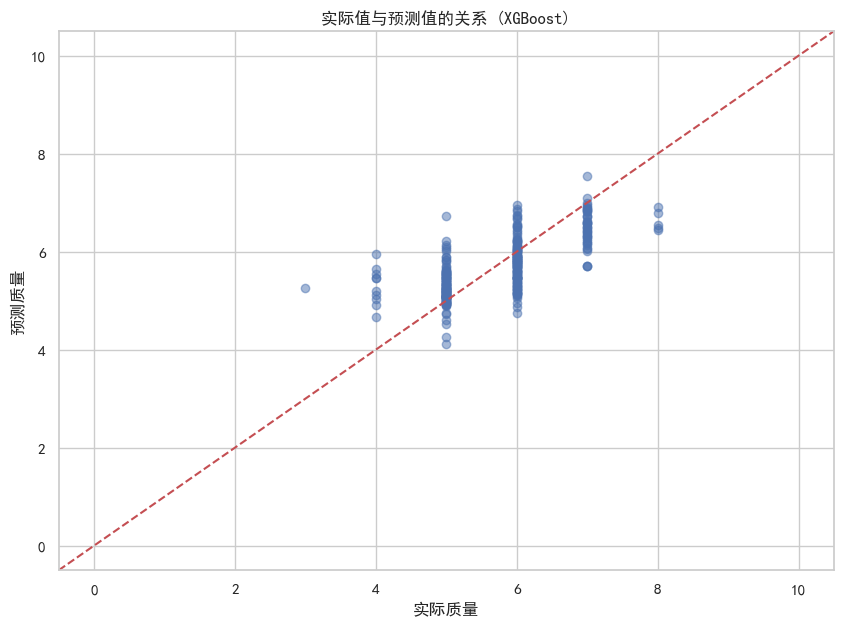

In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 初始化 XGBoost 回归模型
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# 训练模型
xgb_model.fit(X_train, y_train)

# 预测
xgb_pred = xgb_model.predict(X_test)

# 计算性能指标
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# 输出 XGBoost 模型的指标
print(f"XGBoost模型: MSE = {xgb_mse:.4f}, R² = {xgb_r2:.4f}")

# 可视化实际值与预测值的关系
plt.figure(figsize=(10, 7))
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.xlabel('实际质量')
plt.ylabel('预测质量')
plt.title('实际值与预测值的关系 (XGBoost)')
plt.axline([0, 0], [10, 10], color='r', linestyle='--')  # 添加对角线
plt.show()